In [192]:
from numpy.fft import fft
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import numpy as np

In [193]:
N_data = 2500  # Number of training data in final augmented dataset
L = 1024      # Length of IQ sequence in each sample
D = 100 # Decimation factor for long-term data
SNRdBmin = 10
SNRdBmax = 20

In [194]:
max_pw  = 1000 # Pulse Width (us)
max_pri = 1000 # Pulse Repetition Interval (us)
SNRdBmin = 0
SNRdBmax = 20
fs = 20e6

In [195]:
data = np.zeros((N_data, L, 8))
labels = np.zeros((N_data, 4)) # 4 columns: 0 is pulse width, 1 is PRI, 2 is SNRdB, 3 is mod_type

for i in range(N_data):
    # Select Radar emitter parameters
    pri = random.uniform(0, np.log10(max_pri)) 
    pri = 10**pri
    pw = random.uniform(0, np.log10(min(pri, max_pw))) # PW needs to be less than pri, or the radar will be CW
    pw = 10**pw
    phase_off = random.uniform(0, 2*np.pi)

    pulse_phase = random.uniform(0, 1) # Phase between 0 and 1 as percent of cycle elapsed at start of waveform
    mod_type = 0

    t = np.linspace(0.0, (L*D-1)/fs, L*D)

    mag =  ((t + pulse_phase*pri) % (pri*1e-6)) < (pw*1e-6)

    x = mag*np.exp(1j*phase_off)

    # Add AWGN noise with random power
    SNRdB = random.uniform(SNRdBmin, SNRdBmax)
    SNR = 10**(SNRdB/10)
    sig_pwr = np.mean(np.abs(x)**2)
    sigma2 = sig_pwr/SNR
    noise = np.random.randn(np.size(x))*np.sqrt(sigma2/2) + 1j*np.random.randn(np.size(x))*np.sqrt(sigma2/2)
    x_long = x + noise

    x_short = x_long[np.arange(0, int(np.size(x_long)/D), 1)]
    x_long = x_long[np.arange(0, np.size(x_long), D)]

    xf_short = fft(x_short)
    xf_long  = fft(x_long)


    x_ms = abs(x_short)
    x_ps = np.angle(x_short)
    x_ml = abs(x_long)
    x_pl = np.angle(x_long)
    xf_ms = abs(xf_short)
    xf_ps = np.angle(xf_short)
    xf_ml = abs(xf_long)
    xf_pl = np.angle(xf_long)

    data[i,:,0] = x_ms
    data[i,:,1] = x_ps
    data[i,:,2] = x_ml
    data[i,:,3] = x_pl
    data[i,:,4] = xf_ms
    data[i,:,5] = xf_ps
    data[i,:,6] = xf_ml
    data[i,:,7] = xf_pl

    labels[i,0] = pw
    labels[i,1] = pri
    labels[i,2] = SNRdB
    labels[i,3] = 0



PW: 2.7294118085201533 PRI: 2.736725771313804


<function matplotlib.pyplot.show(close=None, block=None)>

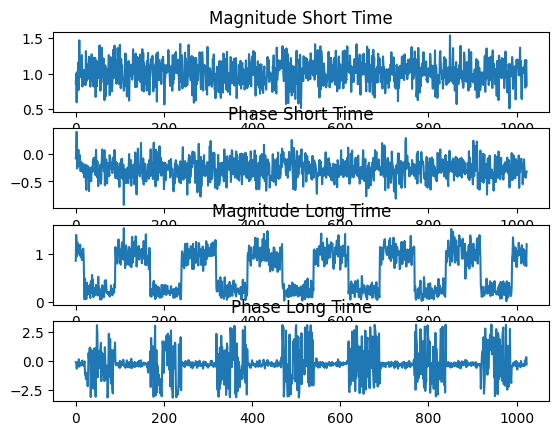

In [196]:
index = 0

print('PW:', pw, 'PRI:', pri)
ax1 = plt.subplot(411)
plt.plot(data[index,:,0])
plt.title('Magnitude Short Time')
ax2 = plt.subplot(412,sharex=ax1)
plt.plot(data[index,:,1])
plt.title('Phase Short Time')
ax1 = plt.subplot(413)
plt.plot(data[index,:,2])
plt.title('Magnitude Long Time')
ax2 = plt.subplot(414,sharex=ax1)
plt.plot(data[index,:,3])
plt.title('Phase Long Time')
plt.show

In [197]:
# Save the generated training data
# data_out_name = 'data05_test_2500'
# labels_out_name = 'labels05_test_2500'
data_out_name = 'trash'
labels_out_name = 'trash'
out_file_dir  = 'training_data/'

np.save(out_file_dir+data_out_name, data)
np.save(out_file_dir+labels_out_name, labels)